In [ ]:
!pip install sdv
!pip install table-evaluator

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 102 kB 5.9 MB/s 
     |████████████████████████████████| 1.6 MB 51.9 MB/s 
     |████████████████████████████████| 53 kB 2.0 MB/s 
     |████████████████████████████████| 61 kB 421 kB/s 
     |████████████████████████████████| 47 kB 5.1 MB/s 
     |████████████████████████████████| 131 kB 68.7 MB/s 
     |████████████████████████████████| 11.2 MB 53.3 MB/s 
     |████████████████████████████████| 960 kB 49.3 MB/s 
     |████████████████████████████████| 291 kB 60.4 MB/s 
     |████████████████████████████████| 636 kB 51.0 MB/s 
     |████████████████████████████████| 15.2 MB 39.9 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0
  Attempting uninstall: psutil
    Found existing installation: psutil 5.4.8
    Uninstalling psutil-5.4.8:
      Successf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 285 kB 8.5 MB/s 
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2


In [53]:
from sdv import load_demo
tables = load_demo()

In [54]:
tables

{'users':    user_id country gender  age
 0        0      US      M   34
 1        1      UK      F   23
 2        2      ES   None   44
 3        3      UK      M   22
 4        4      US      F   54
 5        5      DE      M   57
 6        6      BG      F   45
 7        7      ES   None   41
 8        8      FR      F   23
 9        9      UK   None   30,
 'sessions':    session_id  user_id  device       os  minutes
 0           0        0  mobile  android       23
 1           1        1  tablet      ios       12
 2           2        2  tablet  android        8
 3           3        3  mobile  android       13
 4           4        4  mobile      ios        9
 5           5        5  mobile  android       32
 6           6        6  mobile      ios        7
 7           7        7  tablet      ios       21
 8           8        8  mobile      ios       29
 9           9        9  tablet      ios       34,
 'transactions':    transaction_id  session_id           timestamp  amount 

In [55]:
from sdv import Metadata
metadata = Metadata()

In [56]:
metadata.add_table(
    name='users',
    data=tables['users'],
    primary_key = 'user_id'
)

metadata

Metadata
  root_path: .
  tables: ['users']
  relationships:

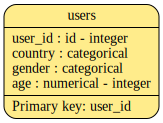

In [57]:
metadata.visualize()

In [58]:
metadata.get_table_meta('users')

{'fields': {'user_id': {'type': 'id', 'subtype': 'integer'},
  'country': {'type': 'categorical'},
  'gender': {'type': 'categorical'},
  'age': {'type': 'numerical', 'subtype': 'integer'}},
 'primary_key': 'user_id'}

In [59]:
metadata.add_table(
    name='sessions',
    data=tables['sessions'],
    primary_key='session_id',
    parent='users',
    foreign_key='user_id'
)

In [60]:
metadata

Metadata
  root_path: .
  tables: ['users', 'sessions']
  relationships:
    sessions.user_id -> users.user_id

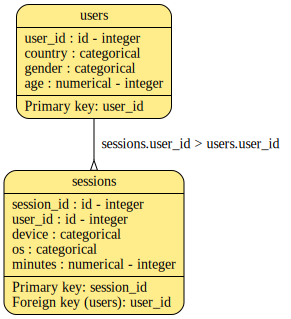

In [61]:
metadata.visualize()

In [62]:
metadata.add_table(
    name='transations',
    data=tables['transactions'],
    primary_key='transaction_id',
    parent='sessions',
    foreign_key='session_id'
)

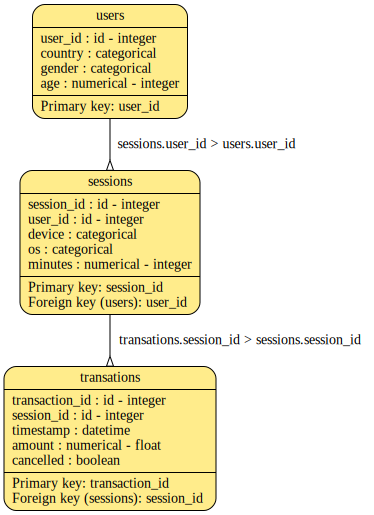

In [63]:
metadata.visualize()

In [64]:
metadata.to_json('demo_metadata.json')

In [65]:
with open('demo_metadata.json') as meta_file:
  print(meta_file.read())

{
    "tables": {
        "users": {
            "fields": {
                "user_id": {
                    "type": "id",
                    "subtype": "integer"
                },
                "country": {
                    "type": "categorical"
                },
                "gender": {
                    "type": "categorical"
                },
                "age": {
                    "type": "numerical",
                    "subtype": "integer"
                }
            },
            "primary_key": "user_id"
        },
        "sessions": {
            "fields": {
                "session_id": {
                    "type": "id",
                    "subtype": "integer"
                },
                "user_id": {
                    "type": "id",
                    "subtype": "integer",
                    "ref": {
                        "table": "users",
                        "field": "user_id"
                    }
                },
                "

In [66]:
loaded = Metadata('demo_metadata.json')
loaded

Metadata
  root_path: 
  tables: ['users', 'sessions', 'transations']
  relationships:
    sessions.user_id -> users.user_id
    transations.session_id -> sessions.session_id

In [67]:
from sdv import load_demo

metadata, tables = load_demo(metadata=True)

In [68]:
metadata

Metadata
  root_path: .
  tables: ['users', 'sessions', 'transactions']
  relationships:
    sessions.user_id -> users.user_id
    transactions.session_id -> sessions.session_id

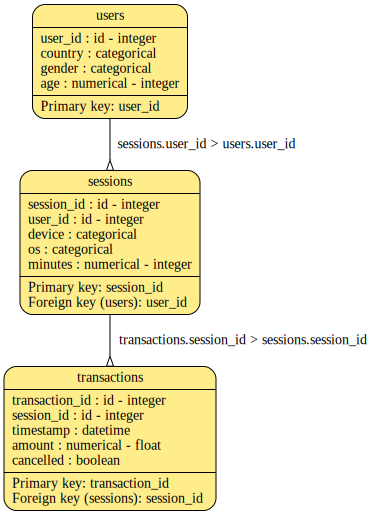

In [70]:
metadata.visualize()

In [71]:
from sdv.relational import HMA1
model = HMA1(metadata)
model.fit(tables)

In [72]:
new_data = model.sample()

In [73]:
new_data

{'users':    user_id country gender  age
 0        0      DE      F   33
 1        1      FR    NaN   35
 2        2      DE      M   42
 3        3      ES      M   54
 4        4      UK      F   32
 5        5      ES      M   50
 6        6      ES    NaN   51
 7        7      US    NaN   41
 8        8      FR    NaN   38
 9        9      ES      F   41,
 'sessions':    session_id  user_id  device       os  minutes
 0           0        0  mobile      ios       27
 1           1        1  mobile  android       25
 2           2        2  mobile  android       28
 3           3        3  tablet  android       19
 4           4        4  mobile      ios       17
 5           5        5  mobile  android        7
 6           6        6  tablet  android       19
 7           7        7  tablet  android       14
 8           8        8  tablet      ios       26
 9           9        9  mobile  android        7,
 'transactions':    transaction_id  session_id           timestamp  amount 